## INSURANCE PREDICTION: CLASSIFICATION PROBLEM

Building a predictive model to determine if a building will have an insurance claim during a certain period or not.
Predicting the probability of having at least one claim over the insured period of the building.The model will be based on the building characteristics. The target variable, Claim, is a:

-->1 if the building has at least a claim over the insured period.

-->0 if the building doesn’t have a claim over the insured period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Loading in the data (Training and Testing Data)
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv("test_data.csv")

In [3]:
test_df.shape

(3069, 13)

In [4]:
train_df.Claim.value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [5]:
train_df.Garden.value_counts()

O    3602
V    3551
Name: Garden, dtype: int64

In [6]:
train_df.Building_Fenced.value_counts()

N    3608
V    3552
Name: Building_Fenced, dtype: int64

In [7]:
train_df.Geo_Code.value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
57433      1
66025      1
81065      1
77294      1
54483      1
Name: Geo_Code, Length: 1307, dtype: int64

### EDA ON THE TRAINING DATA SET

In [8]:
train_df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [9]:
#Checking the shape of the dataset
print("The shape of the training data set is:", train_df.shape)
print("The size of the training data set is:", train_df.size)

The shape of the training data set is: (7160, 14)
The size of the training data set is: 100240


In [10]:
#Checking the info of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [11]:
#Changing the YearOfObservation and Date_of_Occupancy datatype to datetime
train_df['Date_of_Occupancy'] = pd.to_datetime(train_df['Date_of_Occupancy'])
train_df['YearOfObservation'] = pd.to_datetime(train_df['YearOfObservation'])

#### DEALING WITH NULL VALUES

In [12]:
#Checking for null values
missing_data = train_df.isnull().sum().sort_values(ascending=False).head(15)
percentage_missing_data = train_df.isnull().sum()/train_df.isnull().count().sort_values(ascending = False) * 100
missing_values = pd.concat([missing_data, percentage_missing_data], axis=1, keys=['missing_data', 'percentage'])
missing_values.head(20)

,missing_data,percentage
Date_of_Occupancy,508,7.094972
Building Dimension,106,1.480447
Geo_Code,102,1.424581
Garden,7,0.097765
Claim,0,0.000000
NumberOfWindows,0,0.000000
Building_Type,0,0.000000
Settlement,0,0.000000
Building_Fenced,0,0.000000
Building_Painted,0,0.000000


Since the missing data is below 50% the columns with integer data type will be filled by their mean and the columns having Nulls and are objects will be filled using their mode.

If the missing data in the columns was above 50% these columns would be dropped.


In [13]:
#Filling Garden Categorical value column Nulls with their mode
train_df['Garden'] = train_df['Garden'].fillna(train_df['Garden'].mode()[0])
train_df['Geo_Code'] = train_df['Geo_Code'].fillna(train_df['Geo_Code'].mode()[0])


In [14]:
train_df['Building Dimension'] = train_df['Building Dimension'].fillna(train_df['Building Dimension'].median())


In [15]:
#Checking if there are any null values
train_df.isnull().sum().sort_values(ascending=False).head(15)

Date_of_Occupancy     508
Claim                   0
Geo_Code                0
NumberOfWindows         0
Building_Type           0
Building Dimension      0
Settlement              0
Garden                  0
Building_Fenced         0
Building_Painted        0
Residential             0
Insured_Period          0
YearOfObservation       0
Customer Id             0
dtype: int64

(array([1.15740741e-11, 2.31481481e-11, 3.47222222e-11]),
 [Text(1.1574074074074074e-11, 0, '1970'),
  Text(2.3148148148148147e-11, 0, '1970'),
  Text(3.472222222222222e-11, 0, '1970')])

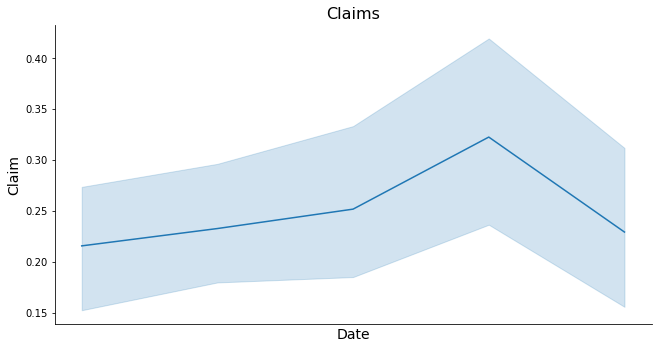

In [16]:
sns.relplot(x='YearOfObservation', y='Claim', data=train_df.iloc[::10, :], kind='line', height=4.5, aspect=2)
plt.ylabel('Claim', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Claims', fontsize=16)
plt.xticks(rotation=90)

In [17]:
train_df2 = train_df.drop(['Date_of_Occupancy', 'YearOfObservation','Customer Id', 'NumberOfWindows'], axis = 'columns')

Since all values have a null value of 0 we can go to visualization of the data to gain more insights on the data

In [18]:
train_df2.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Geo_Code,Claim
0,1.0,0,N,V,V,U,290.0,1,1053,0
1,1.0,0,V,N,O,R,490.0,1,1053,0
2,1.0,0,N,V,V,U,595.0,1,1053,0
3,1.0,0,V,V,V,U,2840.0,1,1053,0
4,1.0,0,V,N,O,R,680.0,1,1053,0


### DATA VISUALIZATION

##### Checking the correlation of the x and y features using seaborn

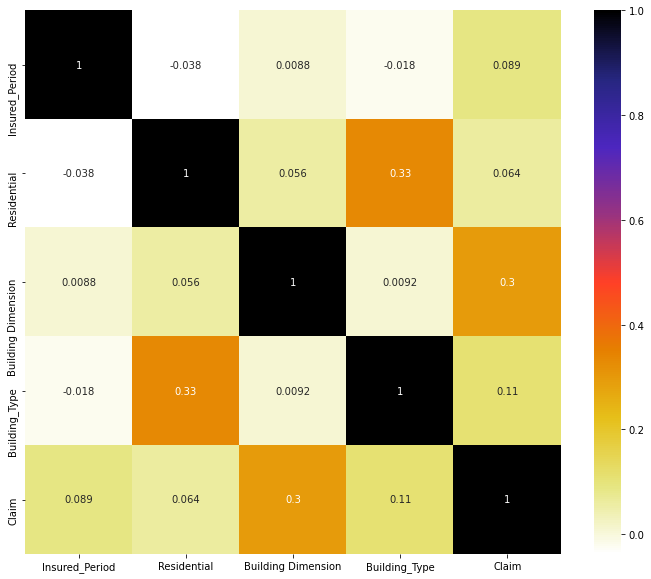

In [19]:
#Correlation Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df2.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

The correlation between the target variable and the x features is low.

->Variables like Number of windows and Building Dimension have a little correlation with the target variable

The correlation between the x variables is low thus there is no case of multicollinearity.

#### Visualization of one feature at a time, their distribution, normality 

In [20]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      7160 non-null   float64
 1   Residential         7160 non-null   int64  
 2   Building_Painted    7160 non-null   object 
 3   Building_Fenced     7160 non-null   object 
 4   Garden              7160 non-null   object 
 5   Settlement          7160 non-null   object 
 6   Building Dimension  7160 non-null   float64
 7   Building_Type       7160 non-null   int64  
 8   Geo_Code            7160 non-null   object 
 9   Claim               7160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 559.5+ KB


In [21]:
train_df2.Claim.value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

### Visualization between Numerical Variables

### HISTOGRAMS

Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

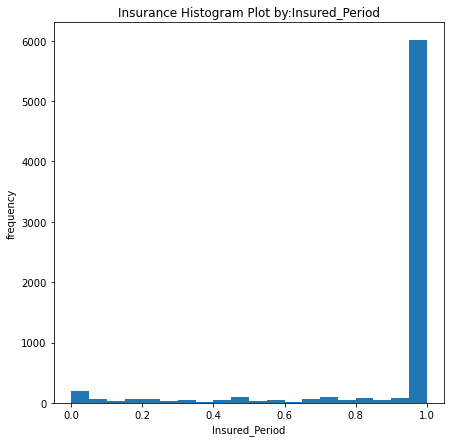

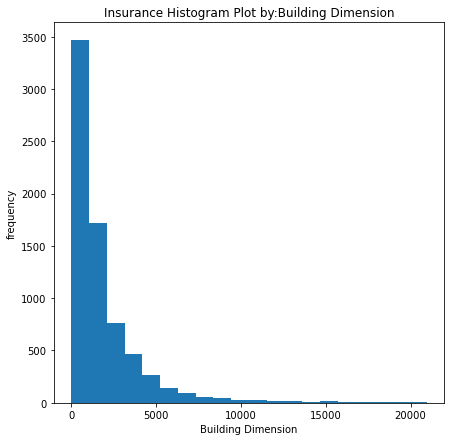

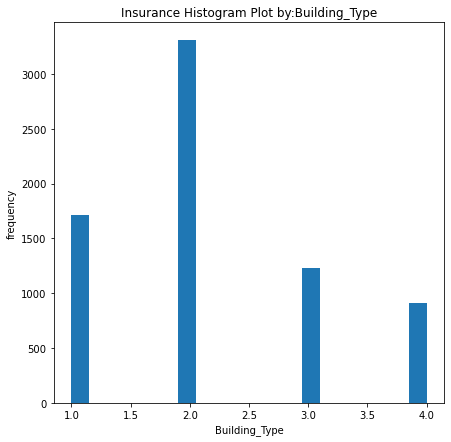

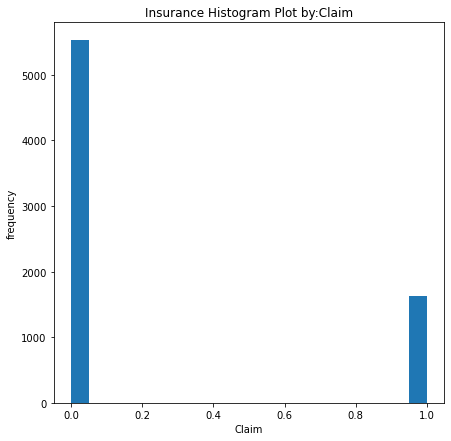

In [22]:
def plot_histogram(df, cols, bins=20):
    for col in cols:
        fig = plt.figure(figsize=(7,7))
        ax = fig.gca()
        #bins = 20
        train_df[col].plot.hist(ax=ax, bins=bins)
        ax.set_title("Insurance Histogram Plot by:" + col)
        ax.set_xlabel(col)
        ax.set_ylabel('frequency')
        plt.show()
        
plt_cols = ['Insured_Period', 'Building Dimension', 'Building_Type', 'Claim']
plot_histogram(train_df2, plt_cols)

### Insights on the histograms

-> Under Insured Period, most people have insured themselves for a whole year

->Under Building Dimension, Most individuals have houses with less dimentions while less people houses have less dimension. The building dimension is skewed to the right thus stanndardization cannot be applied to it since it lacks a normal distribution

-> Under Building Type, Building Type two has the most individuals, followed by building type 1, then 3 and lastly 4

->Under Number of windows; Most individuals have 4 windowsfollowed by 3 then 5. The least number of windows is 9

-> On the Claim Histogram, Most people have a 0 claim during the insured period


/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


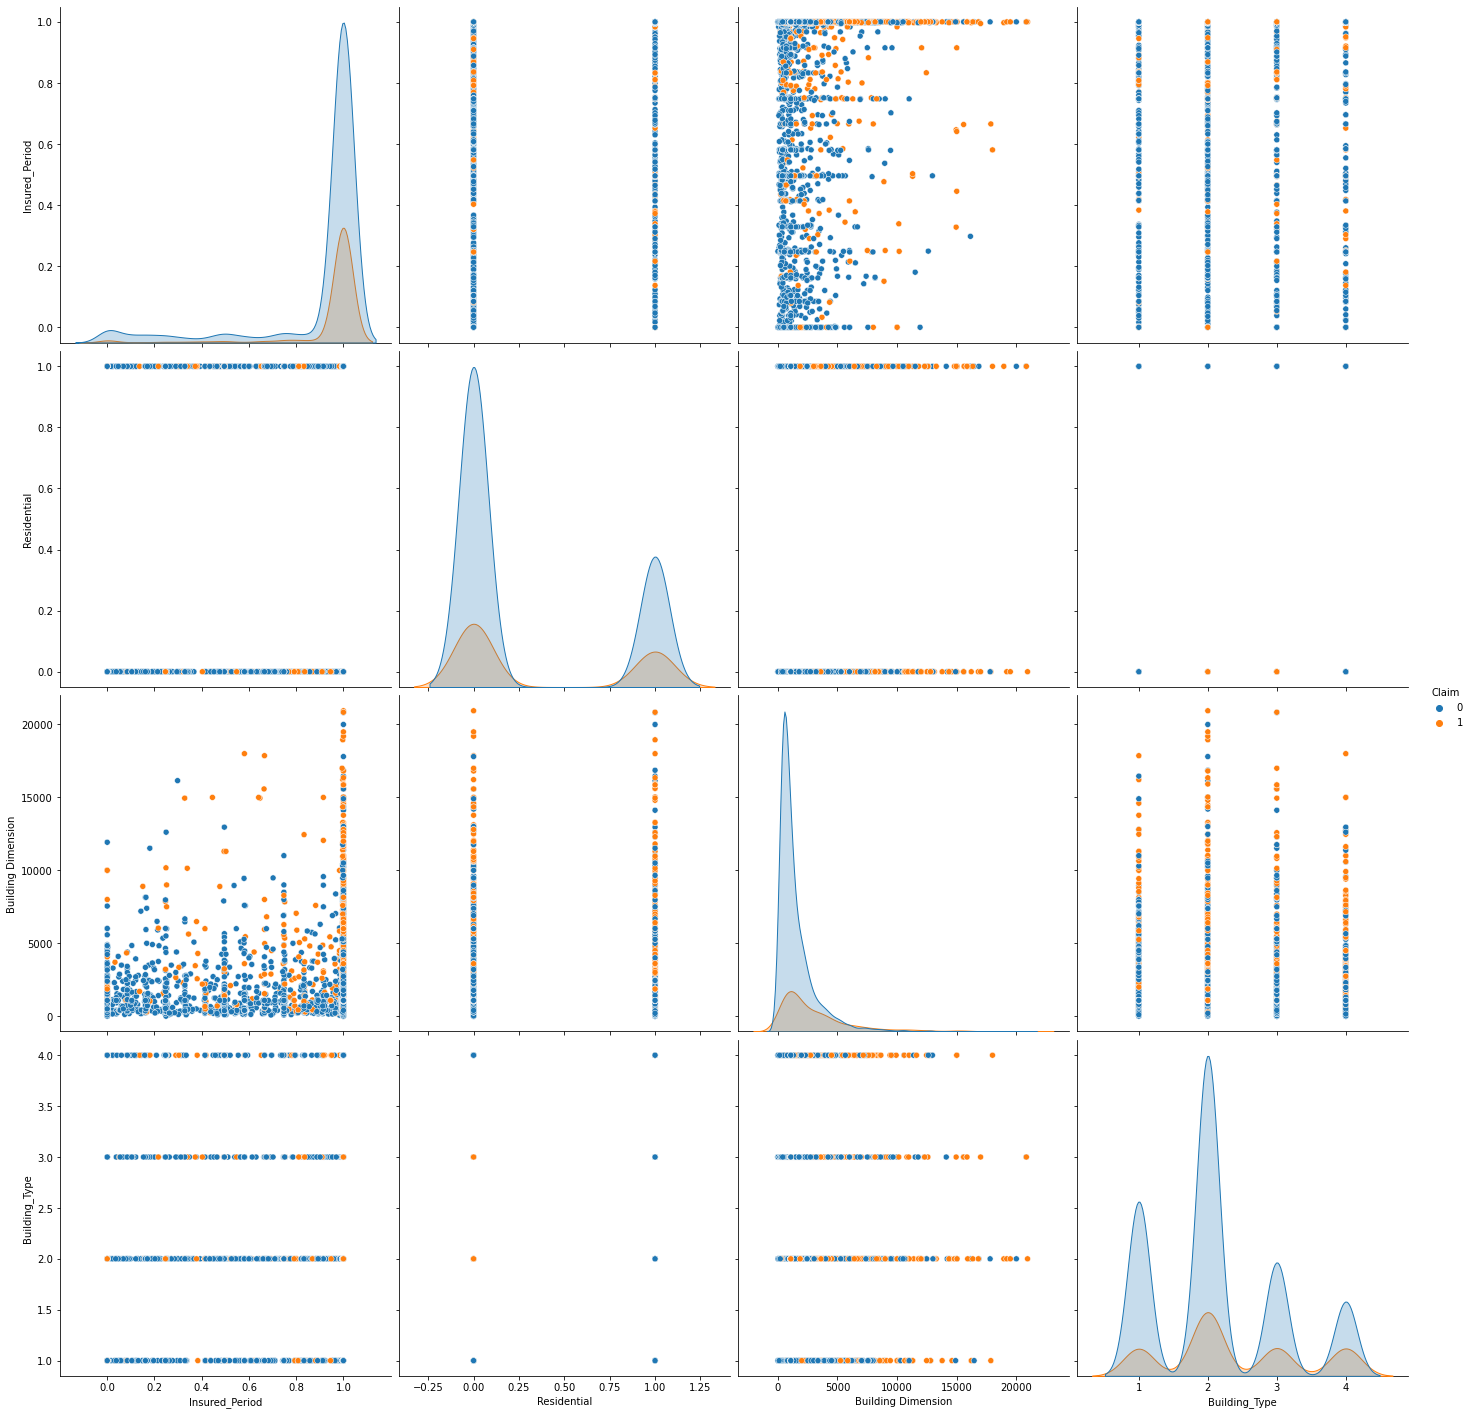

In [23]:
sns.pairplot(train_df, hue="Claim", size=5)

#### Visualization of the relationships between features

In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid")

#### Relationship between Insured Period and Building Dimension

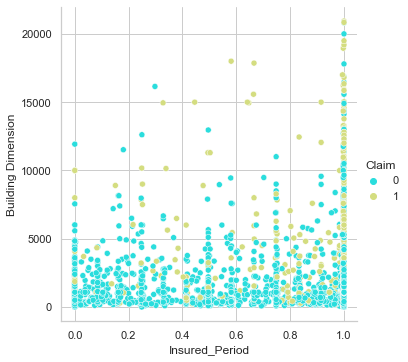

In [25]:
sns.relplot(x="Insured_Period", y ='Building Dimension', hue="Claim", palette ='rainbow',data=train_df2)


As the building dimension increases the insurance period increases too

#### Relationship between Building Type and Building Dimension

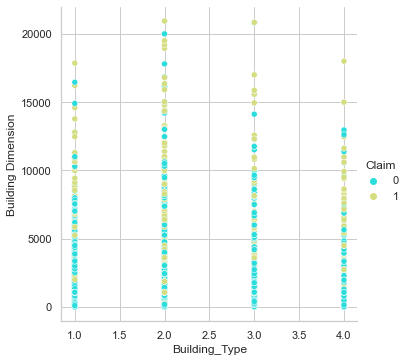

In [26]:
sns.relplot(x="Building_Type", y ='Building Dimension', hue="Claim", palette ='rainbow',data=train_df2)


Building Type 2 has the highest dimension
The greater the building dimension the more claims are made

#### Relationship between NumberOfWindows and Building Dimension

### Visualization between Numerical and Categorical variables

In [27]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      7160 non-null   float64
 1   Residential         7160 non-null   int64  
 2   Building_Painted    7160 non-null   object 
 3   Building_Fenced     7160 non-null   object 
 4   Garden              7160 non-null   object 
 5   Settlement          7160 non-null   object 
 6   Building Dimension  7160 non-null   float64
 7   Building_Type       7160 non-null   int64  
 8   Geo_Code            7160 non-null   object 
 9   Claim               7160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 559.5+ KB


<AxesSubplot:xlabel='Building_Painted', ylabel='count'>

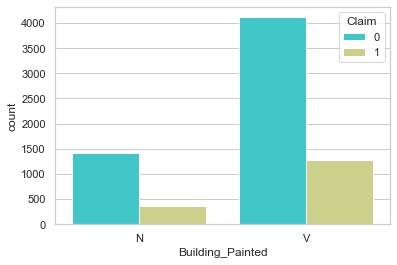

In [28]:
#Building_Painted,"is the building painted or not (N-Painted, V-Not Painted)"
sns.countplot(x='Building_Painted', hue="Claim", palette ='rainbow',data=train_df2)


In [29]:
#There is class imbalance on this feature
#Dropping it will be an option since it will not provide much insight
train_df2.Building_Painted.value_counts()

V    5382
N    1778
Name: Building_Painted, dtype: int64

<AxesSubplot:xlabel='Building_Fenced', ylabel='count'>

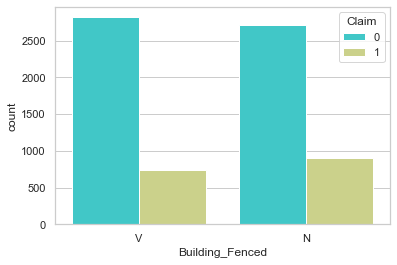

In [30]:
sns.countplot(x='Building_Fenced', hue="Claim", palette ='rainbow',data=train_df2)

<AxesSubplot:xlabel='Garden', ylabel='count'>

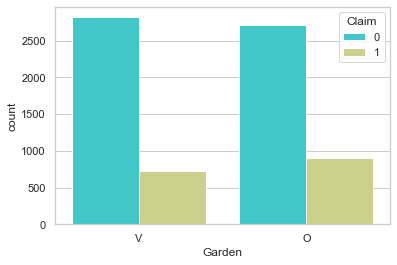

In [31]:
sns.countplot(x='Garden', hue="Claim", palette ='rainbow',data=train_df2)


<AxesSubplot:xlabel='Settlement', ylabel='count'>

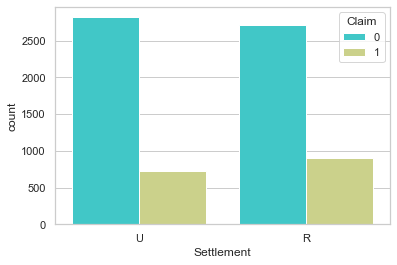

In [32]:
sns.countplot(x='Settlement', hue="Claim", palette ='rainbow',data=train_df2)


In [33]:
train_df2 = train_df2.drop(['Geo_Code'], axis='columns')
train_df2.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim
0,1.0,0,N,V,V,U,290.0,1,0
1,1.0,0,V,N,O,R,490.0,1,0
2,1.0,0,N,V,V,U,595.0,1,0
3,1.0,0,V,V,V,U,2840.0,1,0
4,1.0,0,V,N,O,R,680.0,1,0


In [34]:
train_df2.Insured_Period.value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.680328       1
0.819672       1
0.792350       1
0.378082       1
0.803279       1
Name: Insured_Period, Length: 401, dtype: int64

In [35]:
train_df2.Insured_Period.max(), train_df2.Insured_Period.min()

(1.0, 0.0)

In [36]:
train_df2.size

64440

### ONE HOT ENCODING

In [37]:
train_df3 = pd.get_dummies(train_df2, prefix=['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement'])
train_df3 = pd.DataFrame(train_df3)
train_df3.head()

,Insured_Period,Residential,Building Dimension,Building_Type,Claim,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
0,1.0,0,290.0,1,0,1,0,0,1,0,1,0,1
1,1.0,0,490.0,1,0,0,1,1,0,1,0,1,0
2,1.0,0,595.0,1,0,1,0,0,1,0,1,0,1
3,1.0,0,2840.0,1,0,0,1,0,1,0,1,0,1
4,1.0,0,680.0,1,0,0,1,1,0,1,0,1,0


In [38]:
train_df4 = train_df3.drop(['Building_Painted_V', 'Building_Fenced_V', 'Garden_V', 'Settlement_U'], axis='columns')

train_df4.head()

,Insured_Period,Residential,Building Dimension,Building_Type,Claim,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R
0,1.0,0,290.0,1,0,1,0,0,0
1,1.0,0,490.0,1,0,0,1,1,1
2,1.0,0,595.0,1,0,1,0,0,0
3,1.0,0,2840.0,1,0,0,0,0,0
4,1.0,0,680.0,1,0,0,1,1,1


In [39]:
train_df4['Building_Type'] = train_df4['Building_Type'].map(str)

In [40]:
train_df4['Residential'] = train_df4['Residential'].map(str)

In [41]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      7160 non-null   float64
 1   Residential         7160 non-null   object 
 2   Building Dimension  7160 non-null   float64
 3   Building_Type       7160 non-null   object 
 4   Claim               7160 non-null   int64  
 5   Building_Painted_N  7160 non-null   uint8  
 6   Building_Fenced_N   7160 non-null   uint8  
 7   Garden_O            7160 non-null   uint8  
 8   Settlement_R        7160 non-null   uint8  
dtypes: float64(2), int64(1), object(2), uint8(4)
memory usage: 307.8+ KB


In [42]:
train_df4 = pd.get_dummies(train_df4, prefix=['Residential', 'Building_Type'])
train_df5 = pd.DataFrame(train_df4)
train_df5.head()

,Insured_Period,Building Dimension,Claim,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Residential_1,Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4
0,1.0,290.0,0,1,0,0,0,1,0,1,0,0,0
1,1.0,490.0,0,0,1,1,1,1,0,1,0,0,0
2,1.0,595.0,0,1,0,0,0,1,0,1,0,0,0
3,1.0,2840.0,0,0,0,0,0,1,0,1,0,0,0
4,1.0,680.0,0,0,1,1,1,1,0,1,0,0,0


In [43]:
train_df6 = train_df5.drop(['Residential_1', 'Building_Type_4'], axis='columns')
train_df6


,Insured_Period,Building Dimension,Claim,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Building_Type_1,Building_Type_2,Building_Type_3
0,1.000000,290.0,0,1,0,0,0,1,1,0,0
1,1.000000,490.0,0,0,1,1,1,1,1,0,0
2,1.000000,595.0,0,1,0,0,0,1,1,0,0
3,1.000000,2840.0,0,0,0,0,0,1,1,0,0
4,1.000000,680.0,0,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7155,1.000000,1083.0,0,0,0,0,0,0,1,0,0
7156,1.000000,1083.0,1,0,0,0,0,1,0,1,0
7157,0.038251,1083.0,0,0,0,0,0,1,1,0,0
7158,1.000000,1083.0,0,0,0,0,0,1,1,0,0


### SCALING NUMERICAL COLUMNS

In [44]:
#num_columns = train_df6['Building Dimension']
#num_columns = pd.DataFrame(num_columns)
#num_columns

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df6 ['Building Dimension']= pd.DataFrame(scaler.fit_transform(train_df6[['Building Dimension']]))
train_df6.head()

,Insured_Period,Building Dimension,Claim,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Building_Type_1,Building_Type_2,Building_Type_3
0,1.0,0.013802,0,1,0,0,0,1,1,0,0
1,1.0,0.023354,0,0,1,1,1,1,1,0,0
2,1.0,0.028368,0,1,0,0,0,1,1,0,0
3,1.0,0.135584,0,0,0,0,0,1,1,0,0
4,1.0,0.032428,0,0,1,1,1,1,1,0,0


In [46]:
#scaled_num.columns

In [47]:
#train_df7 = pd.concat([train_df6, scaled_num], axis=1)

In [48]:
#train_df7.head()

In [49]:
train_df6.columns

Index(['Insured_Period', 'Building Dimension', 'Claim', 'Building_Painted_N',
       'Building_Fenced_N', 'Garden_O', 'Settlement_R', 'Residential_0',
       'Building_Type_1', 'Building_Type_2', 'Building_Type_3'],
      dtype='object')

In [50]:
train_df6.shape

(7160, 11)

### SPLITTING TRAINING AND TESTING DATA

In [51]:
test_df = pd.read_csv("test_data.csv")

In [52]:
test = pd.read_csv("test_data.csv")

In [53]:
test_df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [54]:
test_df.shape

(3069, 13)

In [55]:
test_df.isnull().sum().sort_values(ascending=False)

Date_of_Occupancy     728
Geo_Code               13
Building Dimension     13
Garden                  4
NumberOfWindows         0
Building_Type           0
Settlement              0
Building_Fenced         0
Building_Painted        0
Residential             0
Insured_Period          0
YearOfObservation       0
Customer Id             0
dtype: int64

In [56]:
test_df = test_df.drop(['Date_of_Occupancy', 'Geo_Code', 'NumberOfWindows', 'YearOfObservation',], axis = 'columns')



In [57]:
test_df.head()

,Customer Id,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type
0,H11920,1.000000,0,V,N,O,R,300.0,1
1,H11921,0.997268,0,V,N,O,R,300.0,1
2,H9805,0.369863,0,V,V,V,U,790.0,1
3,H7493,1.000000,0,V,N,O,R,1405.0,1
4,H7494,1.000000,0,V,N,O,R,1405.0,1


In [58]:
test_df['Garden'] = test_df['Garden'].fillna(test_df['Garden'].mode()[0])
test_df['Building Dimension'] = test_df['Building Dimension'].fillna(train_df['Building Dimension'].median())


In [59]:
test_df.isnull().sum().sort_values(ascending=False)

Building_Type         0
Building Dimension    0
Settlement            0
Garden                0
Building_Fenced       0
Building_Painted      0
Residential           0
Insured_Period        0
Customer Id           0
dtype: int64

In [60]:
test_df.shape

(3069, 9)

In [61]:
test_df['Building Dimension'] = scaler.transform(test_df[['Building Dimension']])

In [62]:
test_df.head()

,Customer Id,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type
0,H11920,1.000000,0,V,N,O,R,0.014280,1
1,H11921,0.997268,0,V,N,O,R,0.014280,1
2,H9805,0.369863,0,V,V,V,U,0.037681,1
3,H7493,1.000000,0,V,N,O,R,0.067052,1
4,H7494,1.000000,0,V,N,O,R,0.067052,1


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3069 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3069 non-null   float64
 8   Building_Type       3069 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 215.9+ KB


In [64]:
test_df['Building_Type'] = test_df['Building_Type'].map(str)
test_df['Residential'] = test_df['Residential'].map(str)

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   object 
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3069 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3069 non-null   float64
 8   Building_Type       3069 non-null   object 
dtypes: float64(2), object(7)
memory usage: 215.9+ KB


In [66]:
#train_df4 = pd.get_dummies(train_df4, prefix=['Residential', 'Building_Type'])

test_df = pd.get_dummies(test_df, columns=['Residential', 'Building_Painted', 'Building_Fenced', 'Garden','Settlement', 'Building_Type'])


In [67]:
test_df.head()

,Customer Id,Insured_Period,Building Dimension,Residential_0,Residential_1,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U,Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4
0,H11920,1.000000,0.014280,1,0,0,1,1,0,1,0,1,0,1,0,0,0
1,H11921,0.997268,0.014280,1,0,0,1,1,0,1,0,1,0,1,0,0,0
2,H9805,0.369863,0.037681,1,0,0,1,0,1,0,1,0,1,1,0,0,0
3,H7493,1.000000,0.067052,1,0,0,1,1,0,1,0,1,0,1,0,0,0
4,H7494,1.000000,0.067052,1,0,0,1,1,0,1,0,1,0,1,0,0,0


In [68]:
test_df.shape

(3069, 17)

In [69]:
test_df2 = test_df.drop(['Building_Painted_V', 'Building_Fenced_V', 'Garden_V', 'Settlement_U', 'Residential_1', 'Building_Type_4'], axis='columns')
test_df2

,Customer Id,Insured_Period,Building Dimension,Residential_0,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Building_Type_1,Building_Type_2,Building_Type_3
0,H11920,1.000000,0.014280,1,0,1,1,1,1,0,0
1,H11921,0.997268,0.014280,1,0,1,1,1,1,0,0
2,H9805,0.369863,0.037681,1,0,0,0,0,1,0,0
3,H7493,1.000000,0.067052,1,0,1,1,1,1,0,0
4,H7494,1.000000,0.067052,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,1.000000,0.051674,1,0,0,0,0,0,0,0
3065,H11720,1.000000,0.051674,1,0,0,0,0,0,1,0
3066,H11721,1.000000,0.051674,1,0,0,0,0,0,1,0
3067,H12408,1.000000,0.051674,1,0,0,0,0,1,0,0


In [70]:
test_df3 = test_df2.drop(['Customer Id'], axis='columns')
test_df3

,Insured_Period,Building Dimension,Residential_0,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Building_Type_1,Building_Type_2,Building_Type_3
0,1.000000,0.014280,1,0,1,1,1,1,0,0
1,0.997268,0.014280,1,0,1,1,1,1,0,0
2,0.369863,0.037681,1,0,0,0,0,1,0,0
3,1.000000,0.067052,1,0,1,1,1,1,0,0
4,1.000000,0.067052,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3064,1.000000,0.051674,1,0,0,0,0,0,0,0
3065,1.000000,0.051674,1,0,0,0,0,0,1,0
3066,1.000000,0.051674,1,0,0,0,0,0,1,0
3067,1.000000,0.051674,1,0,0,0,0,1,0,0


### TRAINING MODELS

In [71]:
#Splitting the train data to X_train, X_test, y_train, y_test
X = train_df6.drop(['Claim'], axis='columns')
y = train_df6['Claim']

In [72]:

print(X.shape)
X.head()

(7160, 10)


,Insured_Period,Building Dimension,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Building_Type_1,Building_Type_2,Building_Type_3
0,1.0,0.013802,1,0,0,0,1,1,0,0
1,1.0,0.023354,0,1,1,1,1,1,0,0
2,1.0,0.028368,1,0,0,0,1,1,0,0
3,1.0,0.135584,0,0,0,0,1,1,0,0
4,1.0,0.032428,0,1,1,1,1,1,0,0


In [73]:
print(y.shape)
y.head()

(7160,)


0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
X_train

,Insured_Period,Building Dimension,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Building_Type_1,Building_Type_2,Building_Type_3
3132,1.000000,0.043889,0,1,1,1,1,1,0,0
4689,1.000000,0.245427,0,1,1,1,0,1,0,0
4262,1.000000,0.095468,0,1,1,1,1,0,1,0
6300,1.000000,0.028607,0,1,1,1,0,0,0,1
4326,0.510929,0.076365,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.035771,0,1,1,1,1,0,1,0
5191,1.000000,0.127465,0,1,1,1,0,0,0,0
5226,1.000000,0.105019,0,1,1,1,0,0,0,0
5390,1.000000,0.030231,1,0,0,0,0,0,1,0


In [76]:
y_test.head()

1894    0
6774    0
239     0
4609    0
5694    0
Name: Claim, dtype: int64

In [77]:
y_train.head()

3132    0
4689    0
4262    1
6300    0
4326    0
Name: Claim, dtype: int64

In [78]:
y_test.value_counts()

0    1820
1     543
Name: Claim, dtype: int64

In [79]:
y_train.value_counts()

0    3706
1    1091
Name: Claim, dtype: int64

### BUILDING MODELS

### Logistic Model

In [80]:
from sklearn.linear_model import LogisticRegression
logistic_mod = LogisticRegression()
logistic_mod.fit(X_train, y_train)

LogisticRegression()

In [81]:
print (logistic_mod.intercept_)
print(logistic_mod.coef_)

[-1.94816482]
[[ 1.01582984  5.40122904 -0.09902284 -0.46415265  0.2438724   0.12950101
  -0.1201376  -0.95151709 -0.63124771 -0.53691567]]


In [82]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15, :])

[[0.82211241 0.17788759]
 [0.81100346 0.18899654]
 [0.66489336 0.33510664]
 [0.87497292 0.12502708]
 [0.78244931 0.21755069]
 [0.79623963 0.20376037]
 [0.83316122 0.16683878]
 [0.47635429 0.52364571]
 [0.8117095  0.1882905 ]
 [0.8428139  0.1571861 ]
 [0.81299521 0.18700479]
 [0.92263069 0.07736931]
 [0.62335135 0.37664865]
 [0.771379   0.228621  ]
 [0.57333102 0.42666898]]


In [83]:
#Assigning a threshold to the probabilities so that you can actually come up with label scores.
def score_model (prob, threshold):
    return np.array([1 if x > threshold else 0 for x in prob[:, 1]])

scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(np.array(y_test[:15]))

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


### EVALUATION

In [84]:
import sklearn.metrics as sklm

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1785                35
Actual negative       482                61

Accuracy  0.78
 
           Positive      Negative
Num case     1820           543
Precision    0.79          0.64
Recall       0.98          0.11
F1           0.87          0.19


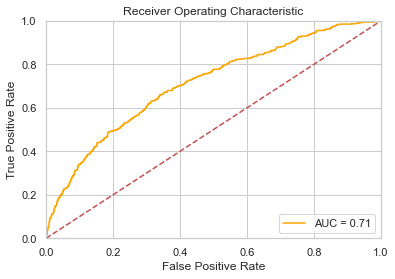

In [85]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Confusion matrix
                 Score positive    Score negative
Actual positive      1820                 0
Actual negative       543                 0

Accuracy  0.77
 
           Positive      Negative
Num case     1820           543
Precision    0.77          0.00
Recall       1.00          0.00
F1           0.87          0.00


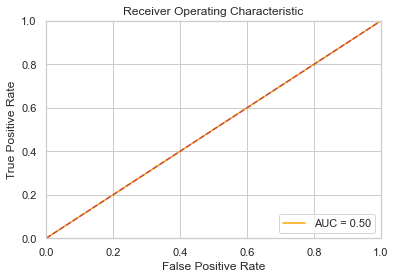

In [86]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive) 


### DEALING WITH IMBALANCED DATA

### 1. Under Sampling

In [87]:
count_class_0, count_class_1  = train_df2['Claim'].value_counts()
#count_clas_00, count_class_11 = y_test.value_counts()

#Divide by class
df_class_0 = train_df6[train_df6['Claim'] == 0]
df_class_1 = train_df6[train_df6['Claim'] == 1]

In [88]:
count_class_0, count_class_1

(5526, 1634)

In [89]:
count_class_0, count_class_1

(5526, 1634)

In [90]:
df_class_0.shape

(5526, 11)

In [91]:
df_class_1.shape

(1634, 11)

In [92]:
## Under sampling class 0
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under, df_class_1], axis=0)
print("Random under-sampling: ")
print(df_test_under.Claim.value_counts())
#df_class_0_under.shape

Random under-sampling: 
1    1634
0    1634
Name: Claim, dtype: int64


In [93]:
df_test_under.tail()

,Insured_Period,Building Dimension,Claim,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Building_Type_1,Building_Type_2,Building_Type_3
7145,1.000000,0.051674,1,0,0,0,0,1,0,1,0
7148,0.945355,0.051674,1,0,0,0,0,1,1,0,0
7152,1.000000,0.051674,1,0,0,0,0,1,0,1,0
7154,1.000000,0.051674,1,0,0,0,0,1,1,0,0
7156,1.000000,0.051674,1,0,0,0,0,1,0,1,0


In [94]:
X = df_test_under.drop(['Claim'], axis='columns')
y = df_test_under['Claim']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
#Stratify ensures balanced samples


In [96]:
# Number of classes in training Data
y_train.value_counts()

1    1307
0    1307
Name: Claim, dtype: int64

In [97]:
y_test.value_counts()

1    327
0    327
Name: Claim, dtype: int64

In [98]:
## Model Training
from sklearn.linear_model import LogisticRegression
logistic_mod = LogisticRegression()
logistic_mod.fit(X_train, y_train)

LogisticRegression()

In [99]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15, :])

[[0.4892719  0.5107281 ]
 [0.35991206 0.64008794]
 [0.3982494  0.6017506 ]
 [0.71837454 0.28162546]
 [0.3465103  0.6534897 ]
 [0.30246496 0.69753504]
 [0.51144217 0.48855783]
 [0.54173546 0.45826454]
 [0.36737206 0.63262794]
 [0.43190382 0.56809618]
 [0.77245056 0.22754944]
 [0.14492443 0.85507557]
 [0.41021374 0.58978626]
 [0.67388091 0.32611909]
 [0.47134209 0.52865791]]


In [100]:
#Assigning a threshold to the probabilities so that you can actually come up with label scores.
def score_model (prob, threshold):
    return np.array([1 if x > threshold else 0 for x in prob[:, 1]])

scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(np.array(y_test[:15]))

[1 1 1 0 1 1 0 0 1 1 0 1 1 0 1]
[0 0 1 0 1 1 1 0 1 1 0 1 1 1 1]


In [101]:
import sklearn.metrics as sklm

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       228                99
Actual negative       123               204

Accuracy  0.66
 
           Positive      Negative
Num case      327           327
Precision    0.65          0.67
Recall       0.70          0.62
F1           0.67          0.65


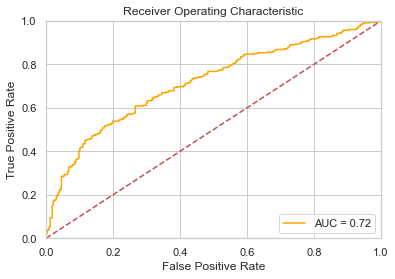

In [102]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

### 2. Over Sampling

In [103]:
count_class_0, count_class_1

(5526, 1634)

In [104]:
df_class_1.sample(count_class_0, replace=True).shape

(5526, 11)

In [105]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.head()

,Insured_Period,Building Dimension,Claim,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Building_Type_1,Building_Type_2,Building_Type_3
6223,1.0,0.300826,1,0,1,1,1,0,0,0,1
6335,1.0,0.089737,1,0,1,1,1,0,0,0,1
3600,1.0,0.038158,1,1,0,0,0,0,0,1,0
4910,1.0,0.050623,1,0,0,0,0,0,0,0,0
2960,1.0,0.058169,1,0,0,0,0,1,0,1,0


In [106]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape

(11052, 11)

In [107]:
print("Random over-sampling: ")
print(df_test_over.Claim.value_counts())

Random over-sampling: 
1    5526
0    5526
Name: Claim, dtype: int64


In [108]:
X = df_test_over.drop(['Claim'], axis="columns")
y = df_test_over['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [109]:
y_train.value_counts()

1    4421
0    4420
Name: Claim, dtype: int64

In [110]:
## Model Training
from sklearn.linear_model import LogisticRegression
logistic_mod = LogisticRegression()
logistic_mod.fit(X_train, y_train)

LogisticRegression()

In [111]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15, :])

[[0.53404347 0.46595653]
 [0.31857527 0.68142473]
 [0.61081059 0.38918941]
 [0.42511145 0.57488855]
 [0.64999159 0.35000841]
 [0.42738644 0.57261356]
 [0.40806385 0.59193615]
 [0.59623513 0.40376487]
 [0.38935672 0.61064328]
 [0.46284685 0.53715315]
 [0.63359986 0.36640014]
 [0.19481517 0.80518483]
 [0.54237498 0.45762502]
 [0.450368   0.549632  ]
 [0.59318519 0.40681481]]


In [112]:
#Assigning a threshold to the probabilities so that you can actually come up with label scores.
def score_model (prob, threshold):
    return np.array([1 if x > threshold else 0 for x in prob[:, 1]])

scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(np.array(y_test[:15]))

[0 1 0 1 0 1 1 0 1 1 0 1 0 1 0]
[1 1 1 1 0 1 1 0 0 0 0 1 1 0 0]


In [113]:
import sklearn.metrics as sklm

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       812               294
Actual negative       455               650

Accuracy  0.66
 
           Positive      Negative
Num case     1106          1105
Precision    0.64          0.69
Recall       0.73          0.59
F1           0.68          0.63


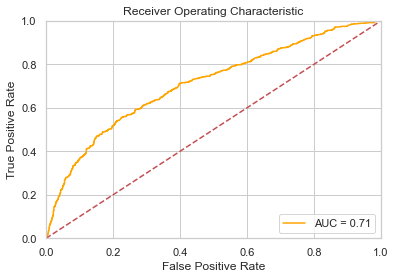

In [114]:
plot_auc(y_test, probabilities) 

### 3. SMOTE

--> OVERSAMPLING BY PRODUCING SYNTHETIC SAMPLES

In [115]:
X = train_df6.drop(['Claim'], axis="columns")
y = train_df6['Claim']

In [116]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
y.value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [119]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()


1    5526
0    5526
Name: Claim, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


In [121]:
X_train.head()

,Insured_Period,Building Dimension,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Residential_0,Building_Type_1,Building_Type_2,Building_Type_3
10046,1.0,0.022458,1,0,0,0,1,1,0,0
10607,1.0,0.250375,0,0,0,0,0,0,0,1
1939,1.0,0.048665,0,1,1,1,1,1,0,0
10817,1.0,0.096166,0,0,0,0,1,1,0,0
506,1.0,0.525288,0,1,1,1,1,0,0,0


In [122]:
y_train.value_counts()

1    4421
0    4420
Name: Claim, dtype: int64

In [123]:
y_test.value_counts()

0    1106
1    1105
Name: Claim, dtype: int64

In [124]:
## Model Training
from sklearn.linear_model import LogisticRegression
logistic_mod = LogisticRegression()
logistic_mod.fit(X_train, y_train)

LogisticRegression()

In [125]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15, :])

[[0.58358623 0.41641377]
 [0.12041212 0.87958788]
 [0.35638401 0.64361599]
 [0.60697296 0.39302704]
 [0.65925053 0.34074947]
 [0.63046619 0.36953381]
 [0.58675654 0.41324346]
 [0.59337617 0.40662383]
 [0.38481796 0.61518204]
 [0.44952254 0.55047746]
 [0.62426559 0.37573441]
 [0.39266792 0.60733208]
 [0.07033463 0.92966537]
 [0.44762003 0.55237997]
 [0.58303315 0.41696685]]


In [126]:
#Assigning a threshold to the probabilities so that you can actually come up with label scores.
def score_model (prob, threshold):
    return np.array([1 if x > threshold else 0 for x in prob[:, 1]])

scores2 = score_model(probabilities, 0.5)
print(np.array(scores2[:15]))
print(np.array(y_test[:15]))

[0 1 1 0 0 0 0 0 1 1 0 1 1 1 0]
[1 1 1 1 0 1 1 0 0 0 0 1 1 0 0]


In [127]:
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       812               294
Actual negative       455               650

Accuracy  0.66
 
           Positive      Negative
Num case     1106          1105
Precision    0.64          0.69
Recall       0.73          0.59
F1           0.68          0.63


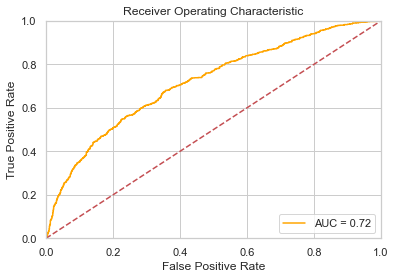

In [128]:
plot_auc(y_test, probabilities) 

### 4. Ensemble Method

positives to be more important than negatives

->works great with logistic and SVM

### EVALUATING OF THE MODEL

In [129]:
test_df2

,Customer Id,Insured_Period,Building Dimension,Residential_0,Building_Painted_N,Building_Fenced_N,Garden_O,Settlement_R,Building_Type_1,Building_Type_2,Building_Type_3
0,H11920,1.000000,0.014280,1,0,1,1,1,1,0,0
1,H11921,0.997268,0.014280,1,0,1,1,1,1,0,0
2,H9805,0.369863,0.037681,1,0,0,0,0,1,0,0
3,H7493,1.000000,0.067052,1,0,1,1,1,1,0,0
4,H7494,1.000000,0.067052,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,1.000000,0.051674,1,0,0,0,0,0,0,0
3065,H11720,1.000000,0.051674,1,0,0,0,0,0,1,0
3066,H11721,1.000000,0.051674,1,0,0,0,0,0,1,0
3067,H12408,1.000000,0.051674,1,0,0,0,0,1,0,0


In [130]:
probabilities = logistic_mod.predict_proba(test_df3)

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [131]:
def score_model (prob, threshold):
    return np.array([1 if x > threshold else 0 for x in prob[:, 1]])

scores3 = score_model(probabilities, 0.5)

In [132]:
scores3

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
scores3 = pd.DataFrame(scores3)

In [134]:
scores3

,0
0,0
1,0
2,0
3,0
4,0
...,...
3064,1
3065,0
3066,0
3067,0


In [135]:
test_df

,Customer Id,Insured_Period,Building Dimension,Residential_0,Residential_1,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U,Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4
0,H11920,1.000000,0.014280,1,0,0,1,1,0,1,0,1,0,1,0,0,0
1,H11921,0.997268,0.014280,1,0,0,1,1,0,1,0,1,0,1,0,0,0
2,H9805,0.369863,0.037681,1,0,0,1,0,1,0,1,0,1,1,0,0,0
3,H7493,1.000000,0.067052,1,0,0,1,1,0,1,0,1,0,1,0,0,0
4,H7494,1.000000,0.067052,1,0,0,1,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,1.000000,0.051674,1,0,0,1,0,1,0,1,0,1,0,0,0,1
3065,H11720,1.000000,0.051674,1,0,0,1,0,1,0,1,0,1,0,1,0,0
3066,H11721,1.000000,0.051674,1,0,0,1,0,1,0,1,0,1,0,1,0,0
3067,H12408,1.000000,0.051674,1,0,0,1,0,1,0,1,0,1,1,0,0,0


In [136]:
test_df['Customer Id'] 

0       H11920
1       H11921
2        H9805
3        H7493
4        H7494
         ...  
3064    H11583
3065    H11720
3066    H11721
3067    H12408
3068     H9021
Name: Customer Id, Length: 3069, dtype: object

In [137]:
customer_id = pd.DataFrame(test_df['Customer Id'] )

In [138]:
customer_id

,Customer Id
0,H11920
1,H11921
2,H9805
3,H7493
4,H7494
...,...
3064,H11583
3065,H11720
3066,H11721
3067,H12408


In [139]:
submissions = pd.concat([customer_id, scores3], join='outer', axis=1)

In [140]:
submissions

,Customer Id,0
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
...,...,...
3064,H11583,1
3065,H11720,0
3066,H11721,0
3067,H12408,0


In [141]:
submissions.rename(columns={0 : 'Claim'}, inplace=True)

In [142]:
submissions

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
...,...,...
3064,H11583,1
3065,H11720,0
3066,H11721,0
3067,H12408,0
